In [146]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [147]:
uber_data=pd.read_csv("C:/Users/Gajendra/Downloads/archive/My Uber Drives - 2016.csv")

In [148]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [149]:
print(uber_data.isnull().sum())
uber_data.head()
uber_data=uber_data.dropna()
len(list(uber_data))
uber_data.head()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [150]:
uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'],format="%m/%d/%Y %H:%M")
uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'],format="%m/%d/%Y %H:%M")

uber_data['HOUR']=[x.hour for x in uber_data['START_DATE*']]
uber_data['DAY']=[x.day for x in uber_data['START_DATE*']]
uber_data['MONTH']=[x.month for x in uber_data['START_DATE*']]
uber_data['WEEKDAY']=[calendar.day_name[x.dayofweek] for x in uber_data['START_DATE*']]
uber_data['DAY_OF_WEEK']=[x.dayofweek for x in uber_data['START_DATE*']]

In [151]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

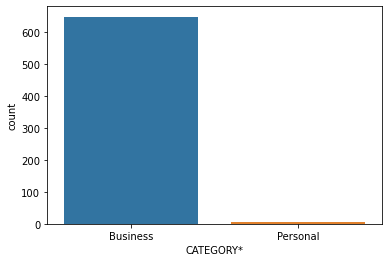

In [152]:
sns.countplot(x='CATEGORY*',data=uber_data)

<AxesSubplot:ylabel='Frequency'>

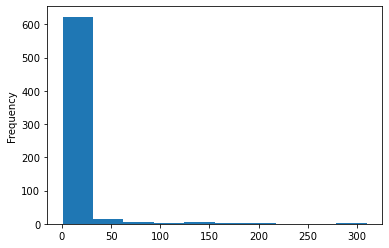

In [153]:
uber_data['MILES*'].plot.hist()

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

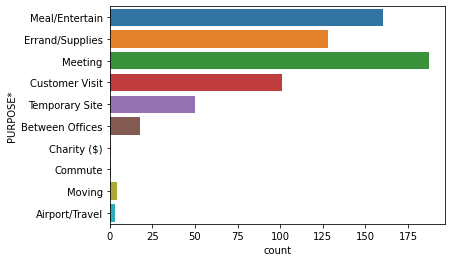

In [154]:
sns.countplot(y='PURPOSE*',data=uber_data)

In [ ]:
sns.countplot(x='START*',data=uber_data)

<AxesSubplot:xlabel='START*', ylabel='count'>

In [ ]:
hours=uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel("Frequency")
plt.title('Number of trips vs hours')

In [ ]:
WEEK=uber_data['WEEKDAY'].value_counts()
WEEK.plot(kind='barh',color='GREEN',figsize=(10,5))
plt.xlabel('DAYS')
plt.ylabel("Frequency")
plt.title('Number of trips vs DAYS')

In [ ]:
MONTH=uber_data['MONTH'].value_counts()
MONTH.plot(kind='bar',color='PURPLE',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel("Frequency")
plt.title('Number of trips vs MONTHS')

In [ ]:
DAYS=uber_data['DAY'][uber_data['MONTH']==12].value_counts()
DAYS.plot(kind='bar',color='BLUE',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel("Frequency")
plt.title('Number of trips vs DAYS OF DECEMBER')

In [ ]:
start=uber_data['START*'].value_counts().nlargest(10)
start.plot(kind='barh',color='BLUE',figsize=(10,5))
plt.xlabel('frequency')
plt.ylabel("pickuppoint")
plt.title('pickup point vs frequency')

In [132]:
new=pd.read_csv("C:/Users/Gajendra/Downloads/archive (2)/rideshare_kaggle.csv")

In [133]:
new.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
